<a href="https://colab.research.google.com/github/njafarov/Optimization_NLP/blob/main/Callenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 2.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 


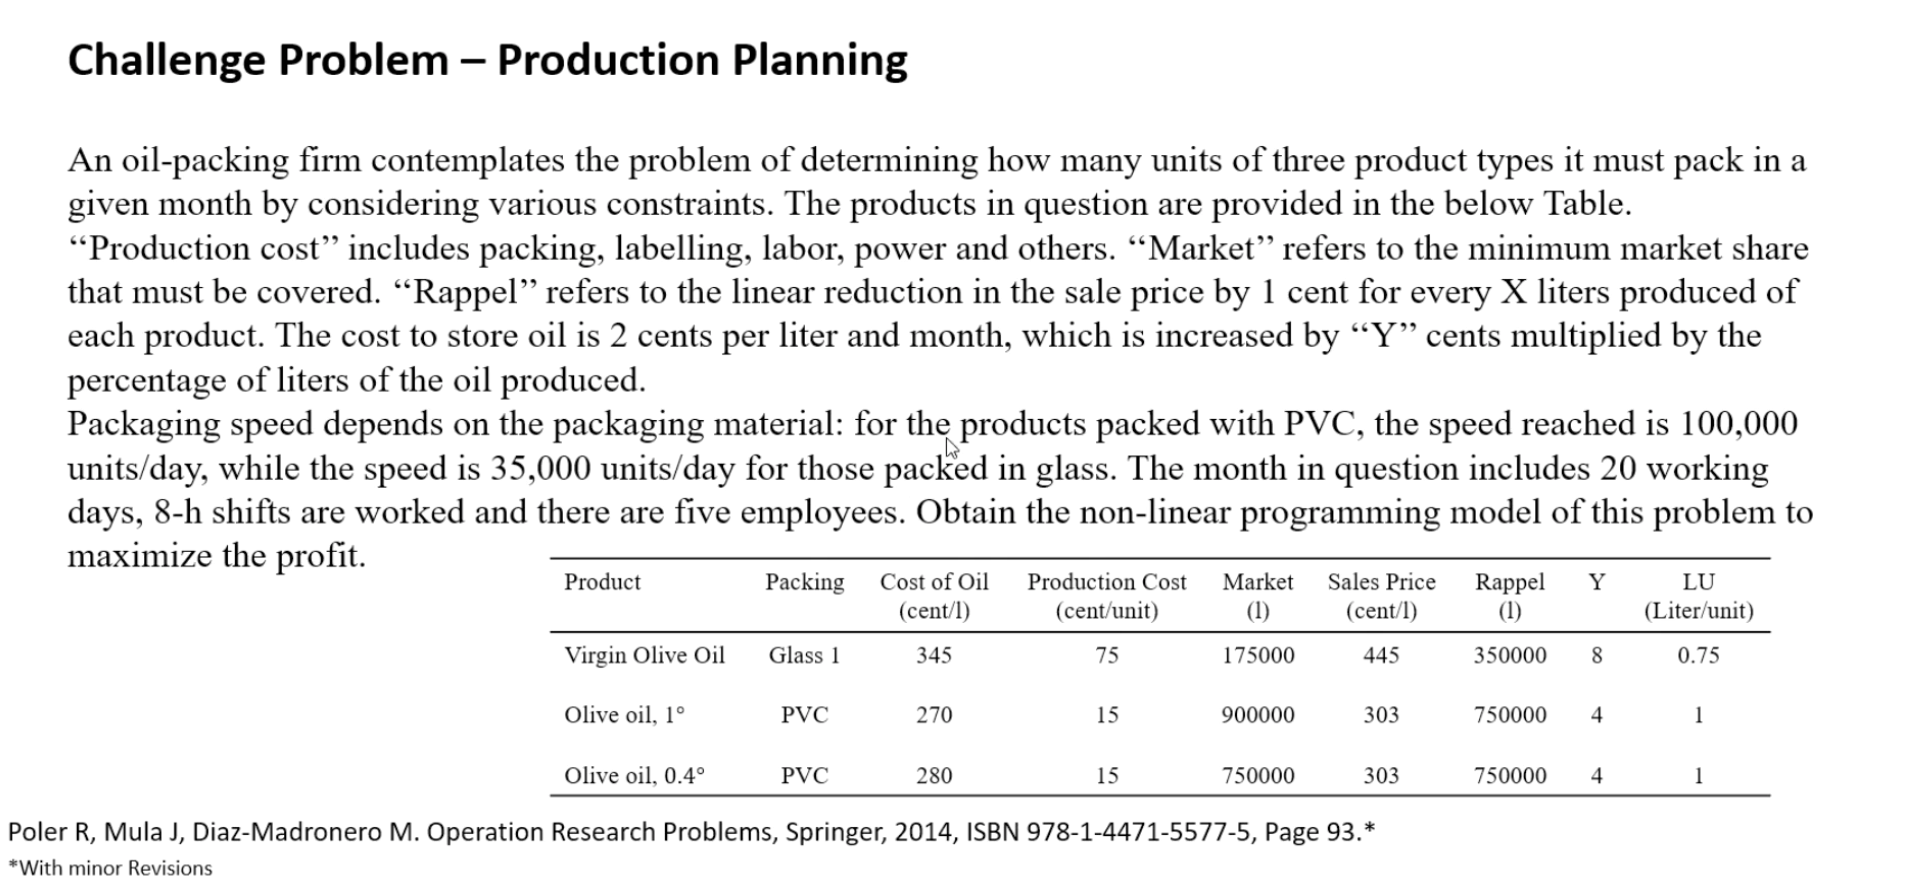

In [ ]:
from ast import expr
# Define the model
model = pyo.ConcreteModel()

# Define sets
model.i = pyo.Set(initialize=['Virgin Olive Oil','Olive oil 1','Olive oil 0.4'])
# Alies Set
model.j = pyo.Set(initialize=model.i)

#Parameters
model.LU = pyo.Param(model.i, initialize={'Virgin Olive Oil':0.75,'Olive oil 1':1,
                                               'Olive oil 0.4':1})
LU = model.LU # Conversion between item and litre 

model.S_Price = pyo.Param(model.i, initialize={'Virgin Olive Oil':4.45,'Olive oil 1':3.03,
                                               'Olive oil 0.4':3.03})
S_Price = model.S_Price # Sales price

model.Cost = pyo.Param(model.i, initialize={'Virgin Olive Oil':3.45,'Olive oil 1':2.70,
                                               'Olive oil 0.4':2.80})
Cost = model.Cost

model.Prod_Cost = pyo.Param(model.i, initialize={'Virgin Olive Oil':0.75,'Olive oil 1':0.15,
                                               'Olive oil 0.4':0.15})
Prod_Cost = model.Prod_Cost


model.Storage_Cost = pyo.Param(model.i, initialize={'Virgin Olive Oil':0.02,'Olive oil 1':0.02,
                                               'Olive oil 0.4':0.02})
Storage_Cost = model.Storage_Cost

model.Y = pyo.Param(model.i, initialize={'Virgin Olive Oil':0.08,'Olive oil 1':0.04,
                                               'Olive oil 0.4':0.04})
Y = model.Y

model.Rapel = pyo.Param(model.i, initialize={'Virgin Olive Oil':350000,'Olive oil 1':750000,
                                               'Olive oil 0.4':750000})
Rapel = model.Rapel

model.Market = pyo.Param(model.i, initialize={'Virgin Olive Oil':175000,'Olive oil 1':900000,
                                               'Olive oil 0.4':750000})
Market = model.Market


model.Speed = pyo.Param(model.i, initialize={'Virgin Olive Oil':35000,'Olive oil 1':100000,
                                               'Olive oil 0.4':100000})
Speed = model.Speed


# Decision variable
model.x = pyo.Var(model.i, domain=pyo.NonNegativeReals)
x = model.x


#Objective function
def objective_function(model,i):
  return sum(x[i]*LU[i]*(S_Price[i]-(x[i]*LU[i]/(100*Rapel[i])))for i in model.i)
  -sum(x[i]*LU[i]*Cost[i]for i in model.i)-sum(x[i]*Prod_Cost[i] for i in model.i)
  -sum(Storage_Cost[i]*x[i]*LU[i]*(1+Y[i]*(x[i]*LU[i]/sum(x[j]*LU[j] for j in model.j))) for i in model.i) 

  
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.maximize)

#Constrains
def cons1(model,i):
  return sum(x[i]/Speed[i] for i in model.i)<=20
model.Cons1 = pyo.Constraint(model.i, rule=cons1)

def cons2(model,i):
  return x['Virgin Olive Oil']/LU['Virgin Olive Oil']>=Market['Virgin Olive Oil']
model.Cons2 = pyo.Constraint(model.i, rule=cons2)



def cons3(model,i):
  return x['Olive oil 1']/LU['Olive oil 1']>=Market['Olive oil 1']
model.Cons3 = pyo.Constraint(model.i, rule=cons3)

def cons4(model,i):
  return x['Olive oil 0.4']/LU['Olive oil 0.4']>=Market['Olive oil 0.4']
model.Cons4 = pyo.Constraint(model.i, rule=cons4)


# Solution
Solver = SolverFactory('ipopt',executable = '/content/ipopt')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  print("The amount of product ",i,"is ", x[i]())

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.



Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03606128692626953
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  5418969.965527972
The amount of product  Virgin Olive Oil is  131249.99868753183
The amount of product  Olive oil 1 is  899999.991000091
The amount of product  Olive oil 0.4 is  749999.992500091
